## IMPORTING FILES AND LIBRARIES



In [ ]:
!pip3 install -qU pybiolib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 4.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flax 0.6.9 requires jax>=0.4.2, but you have jax 0.3.25 which is incompatible.


In [ ]:
pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
EDB_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Train data/EDB.train.csv')
IEDB_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Train data/IEDB.train.csv')
EDB_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Test Data/EDB.test.csv')
IEDB_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Test Data/IEDB.test.csv')


## MERGING FILE

In [ ]:
#Merge 2 dataset
df_train = pd.concat([EDB_train, IEDB_train], ignore_index=True)
df_test = pd.concat([EDB_test, IEDB_test], ignore_index=True)

# Sort data by the column 'ANTIGEN_ID'
df_train = df_train.sort_values(by=df_train.columns[0])
df_test = df_test.sort_values(by=df_test.columns[0])

In [ ]:
df_train.head(10)

In [ ]:
# Deleting first seq having wrong format
df_train = df_train.iloc[1:]
df_train.head(10)

,Antigen_ID,Antigen,Y
364,Protein 10,MGGWSSKPRQGMGTNLSVPNPLGFFPDHQLDPAFGANSNNPDWDFN...,"[308, 309, 310, 311, 312, 313, 314, 315, 316, ..."
68,Protein 100,EVVLVNVTENFNMWKNDMVEQMHEDIISLWDQSLKPCVKLTPLCVG...,"[36, 37, 39, 53, 55, 56, 231, 233, 234, 235, 2..."
422,Protein 100,MSVSLHHFIISSGFLTSMFPKAVRRAVTAGVFAAPTLMSFLRCGVM...,"[261, 262, 263, 264, 265, 266, 267, 268, 269, ..."
1038,Protein 1001,DSGCVVSWKNKELKCGSGIFITDNVHTWTEQYKFQPESPSKLASAI...,"[60, 61, 62, 63, 64, 65, 66, 67, 68]"
1039,Protein 1003,MATTEYRLSLMEQFIRAFIEIDKDNNELIDKQELTKYCQQNQMDMK...,"[140, 141, 142, 143, 144, 145, 146, 147, 148, ..."
1040,Protein 1005,AHHAHHVADAHHAHHVADAHHAHHVADAHHAHHAADAHHAHHAADA...,"[200, 201, 202, 203, 204, 205, 206, 207, 208, ..."
1041,Protein 1006,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,"[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4..."
1042,Protein 1008,MDSFNYTTPDYGHYDDKDTLDLNTPVDKTSNTLRVPDILALVIFAV...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1043,Protein 1009,MRLAVICFCLFGIASSLPVKVTDSGSSEEKLYSLHPDPIATWLVPD...,"[146, 147, 148, 149, 150, 151, 152]"
69,Protein 101,EVVLVNVTENFNMWKNDMVEQMHEDIISLWDQSLKPCVKLTPLCVG...,"[36, 37, 39, 53, 55, 56, 233, 235, 236, 237, 2..."


In [ ]:
df_test.head(10)

,Antigen_ID,Antigen,Y
59,Protein 1,KVFGRCELAAAMKRHGLANYRGYSLGNWVCAAKFESNFNTQATNRN...,"[18, 21, 22, 23, 26, 101, 102, 115, 116, 117, ..."
271,Protein 1,MASQKRPSQRHGSKYLATASTMDHARHGFLPRHRDTGILDSIGRFF...,"[109, 110, 111, 112, 113, 114, 115, 116, 117, ..."
21,Protein 10,STATLCLGHHAVPNGTLVKTITDDQIEVTNATELVQSSSTGKICNN...,"[39, 40, 41, 50, 51, 53, 54, 65, 66, 69, 70, 7..."
606,Protein 1000,MKKTLAALIVGAFAASAANAAVVYNNEGTNVELGGRLSIITEQSNS...,"[282, 283, 284, 285, 286, 287, 288, 289, 290, ..."
478,Protein 1002,MELSYRLFICLLLWGSTELCYPQPFWLLQGGASRAETSVQPVLVEC...,"[333, 334, 335, 336, 337, 338, 339, 340, 341, ..."
515,Protein 1004,MARTKQTARKSTGGKAPRKQLATKAARKSAPSTGGVKKPHRYRPGT...,"[52, 53, 54, 55, 56, 57, 58, 59, 60]"
358,Protein 1007,MSESHVKISRTIIRGTSPSTVRLESRVRELEDLLDLERDARVRAER...,"[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7..."
156,Protein 1019,MSKSESPKEPEQLRKLFIGGLSFETTDESLRSHFEQWGTLTDCVVM...,"[292, 293, 294, 295, 296, 297, 298, 299, 300, ..."
46,Protein 102,EVVLVNVTENFNWCKNDMVEQMHEDIISLWDQSLKPCVKLTPLCVG...,"[36, 37, 39, 55, 56, 233, 235, 236, 237, 248, ..."
409,Protein 1024,MVDGTLLLLLSEALALTQTWAGSHSLKYFHTSVSRPGRGEPRFISV...,"[94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 1..."


In [ ]:
df_train.to_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Train data/Train_data.csv')

In [ ]:
df_test.to_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Test Data/Test_data_1.csv')

## CONVERTING INTO FASTA FORMAT

In [ ]:
def create_seq_records(df, id_col, seq_col):
    """
    Create SeqRecord objects from a DataFrame containing protein sequences.
    Arguments:
    - df: pandas DataFrame, containing the sequence and header information of the samples
    - id_col: str, the name of the column that contains the ID of the samples
    - seq_col: str, the name of the column that contains the nucleotide or protein sequences of the samples
    Returns:
    - records: list of SeqRecord objects, a list of SeqRecord objects
    """
    # Convert the data type of the column containing protein sequences to string
    df[seq_col] = df[seq_col].astype(str)

    # Create an empty list to store the SeqRecord objects
    records = []

    # Iterate through each row in the DataFrame
    for row in df.iterrows():
        # Get the header and  protein sequence
        header = row[id_col]
        sequence = row[seq_col]

        # Create a SeqRecord object
        seq_record = SeqRecord(Seq(sequence), id=header, description='')

        # Add the SeqRecord object to the list
        records.append(seq_record)

    return records

In [ ]:
seq_records_train = create_seq_records(df = df_train, id_col = "Antigen_ID", seq_col="Antigen")
# write SeqRecord list to a fasta file
file_path = '/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Train data/Train_data.fasta'
with open(file_path, 'w') as f:
    SeqIO.write(seq_records_train, f, 'fasta')

In [ ]:
seq_records_test = create_seq_records(df = df_train, id_col = "Antigen_ID", seq_col="Antigen")
# write SeqRecord list to a fasta file
file_path = '/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Test Data/Test_data.fasta'
with open(file_path, 'w') as f:
    SeqIO.write(seq_records_test, f, 'fasta')

In [ ]:
def rename_id (df, id):
    df['id'] = df['id'].replace(r'>Protein (\d+)', r'>Protein_\1|1|training', regex=True)
    return df
    #>Protein_10|1|training

##EXTRACTING FEATURE

Train data and test data are be extracted into 18 features by NETSURFP 3.0



In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Train data/01.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Test Data/test01.csv')

In [ ]:
train_data = train_data.sort_values(by=[train_data.columns[0],train_data.columns[2]])
train_data[359:364]

,id,seq,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],q8,...,p[q8_H],p[q8_I],p[q8_B],p[q8_E],p[q8_S],p[q8_T],p[q8_C],phi,psi,disorder
1114379,>Protein 10,M,1,0.830846,186.109440,C,0.000042,0.000097,0.999861,C,...,0.000015,8.502303e-07,0.000014,0.000037,0.000077,0.000137,0.999716,-41.631153,-163.699753,0.998676
1114380,>Protein 10,G,2,0.764765,79.535569,C,0.000306,0.000595,0.999099,C,...,0.000114,1.909426e-05,0.000095,0.000271,0.000514,0.000850,0.998089,95.853409,-128.947647,0.996773
1114381,>Protein 10,G,3,0.738790,76.834126,C,0.000478,0.000476,0.999047,C,...,0.000199,1.440329e-05,0.000100,0.000217,0.000581,0.000835,0.997980,-63.045628,-115.778839,0.997075
1114382,>Protein 10,W,4,0.705228,200.990040,C,0.000705,0.000556,0.998740,C,...,0.000325,7.368159e-06,0.000129,0.000254,0.000703,0.000808,0.997670,-84.183647,-34.732327,0.996904
1114383,>Protein 10,S,5,0.682048,105.717370,C,0.000970,0.000649,0.998380,C,...,0.000504,8.537430e-06,0.000133,0.000307,0.001136,0.001052,0.996709,-87.458794,-89.210396,0.993157


##SLIDING WINDOW

In [ ]:
Sliding_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Train data/data done.csv')

In [ ]:
Sliding_df.head()

,Unnamed: 0,id,seq,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],...,sliding 38,sliding 39,sliding 40,sliding 41,sliding 42,sliding 43,sliding 44,sliding 45,sliding 46,Active_site
0,0,>Protein 10,M,1,0.830846,186.109440,C,0.000042,0.000097,0.999861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,>Protein 10,G,2,0.764765,79.535569,C,0.000306,0.000595,0.999099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,>Protein 10,G,3,0.738790,76.834126,C,0.000478,0.000476,0.999047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3,>Protein 10,W,4,0.705228,200.990040,C,0.000705,0.000556,0.998740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,4,>Protein 10,S,5,0.682048,105.717370,C,0.000970,0.000649,0.998380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
Sliding_df.columns

Index(['Unnamed: 0', 'id', ' seq', ' n', ' rsa', ' asa', ' q3', ' p[q3_H]',
       ' p[q3_E]', ' p[q3_C]', ' q8', ' p[q8_G]', ' p[q8_H]', ' p[q8_I]',
       ' p[q8_B]', ' p[q8_E]', ' p[q8_S]', ' p[q8_T]', ' p[q8_C]', ' phi',
       ' psi', ' disorder', 'sliding 1', 'sliding 2', 'sliding 3', 'sliding 4',
       'sliding 5', 'sliding 6', 'sliding 7', 'sliding 8', 'sliding 9',
       'sliding 10', 'sliding 11', 'sliding 12', 'sliding 13', 'sliding 14',
       'sliding 15', 'sliding 16', 'sliding 17', 'sliding 18', 'sliding 19',
       'sliding 20', 'sliding 21', 'sliding 22', 'sliding 23', 'sliding 24',
       'sliding 25', 'sliding 26', 'sliding 27', 'sliding 28', 'sliding 29',
       'sliding 30', 'sliding 31', 'sliding 32', 'sliding 33', 'sliding 34',
       'sliding 35', 'sliding 36', 'sliding 37', 'sliding 38', 'sliding 39',
       'sliding 40', 'sliding 41', 'sliding 42', 'sliding 43', 'sliding 44',
       'sliding 45', 'sliding 46', 'Active_site'],
      dtype='object')

In [ ]:
Sliding_df = Sliding_df.iloc[:,1:22]
Sliding_df.head()

,id,seq,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],q8,...,p[q8_H],p[q8_I],p[q8_B],p[q8_E],p[q8_S],p[q8_T],p[q8_C],phi,psi,disorder
0,>Protein 10,M,1,0.830846,186.109440,C,0.000042,0.000097,0.999861,C,...,0.000015,8.502303e-07,0.000014,0.000037,0.000077,0.000137,0.999716,-41.631153,-163.699753,0.998676
1,>Protein 10,G,2,0.764765,79.535569,C,0.000306,0.000595,0.999099,C,...,0.000114,1.909426e-05,0.000095,0.000271,0.000514,0.000850,0.998089,95.853409,-128.947647,0.996773
2,>Protein 10,G,3,0.738790,76.834126,C,0.000478,0.000476,0.999047,C,...,0.000199,1.440329e-05,0.000100,0.000217,0.000581,0.000835,0.997980,-63.045628,-115.778839,0.997075
3,>Protein 10,W,4,0.705228,200.990040,C,0.000705,0.000556,0.998740,C,...,0.000325,7.368159e-06,0.000129,0.000254,0.000703,0.000808,0.997670,-84.183647,-34.732327,0.996904
4,>Protein 10,S,5,0.682048,105.717370,C,0.000970,0.000649,0.998380,C,...,0.000504,8.537430e-06,0.000133,0.000307,0.001136,0.001052,0.996709,-87.458794,-89.210396,0.993157


In [ ]:
import numpy as np

# Create a new column 'sli_win_10' and initialize it with NaN values
Sliding_df['sli_win_10'] = np.nan

# Loop through the rows of the DataFrame
for i in range(len(Sliding_df) - 9):
    # Check if the current row and the next nine rows have valid values in the 'seq' column
    if Sliding_df.loc[i:i+9, ' seq'].notnull().all():
        # Assign the desired value to 'sli_win_10' based on the values in 'seq' column
        Sliding_df.at[i, 'sli_win_10'] = Sliding_df.loc[i:i+9, ' seq'].sum()

# Print the updated DataFrame
print(Sliding_df)

                   id  seq    n       rsa         asa  q3   p[q3_H]   p[q3_E]  \
0         >Protein 10    M    1  0.830846  186.109440   C  0.000042  0.000097   
1         >Protein 10    G    2  0.764765   79.535569   C  0.000306  0.000595   
2         >Protein 10    G    3  0.738790   76.834126   C  0.000478  0.000476   
3         >Protein 10    W    4  0.705228  200.990040   C  0.000705  0.000556   
4         >Protein 10    S    5  0.682048  105.717370   C  0.000970  0.000649   
...               ...  ...  ...       ...         ...  ..       ...       ...   
1639852  >Protein 999    F  205  0.198989   47.757457   H  0.658743  0.013471   
1639853  >Protein 999    W  206  0.178917   50.991240   H  0.522071  0.024489   
1639854  >Protein 999    H  207  0.600014  134.403223   C  0.293405  0.027763   
1639855  >Protein 999    K  208  0.528135  124.639846   C  0.112372  0.020683   
1639856  >Protein 999    H  209  0.711205  159.309988   C  0.008501  0.001420   

          p[q3_C]  q8  ... 

In [ ]:
# Create a new DataFrame with columns 'id' and 'sli_win_5'
new_df = Sliding_df[['id', 'sli_win_10','Active_site']].copy()
new_df.head(10)

In [ ]:
# Save the new DataFrame as a CSV file
new_df.to_csv('sliding_window10.csv', index=False)

In [ ]:
# Đừng run
df = pd.read_csv('sliding_window10.csv')
df

In [ ]:
# Đừng run
new_df = df[['id', 'sli_win_10','Active_site']].copy()

In [ ]:
('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Sliding_window/sliding_window10.csv')

In [ ]:
sliding_data =  pd.read.csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Sliding_window/sliding_window10.csv')
sliding_data

,1,0,0.3,0.4,0.5,0.6,0.2,0.7,0.8,0.1,...,0.0.11,0.0.12,0.0.13,0.0.14,0.0.15,0.0.16,0.0.17,0.2222222222222222.2,0.0.18,0.1111111111111111.2
0,1,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097123,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.111111,0.222222
2097124,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.222222,0.111111
2097125,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.111111,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.222222,0.000000
2097126,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.111111,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.111111,0.000000


In [ ]:
test_data.head(5)

,id,seq,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],q8,...,p[q8_H],p[q8_I],p[q8_B],p[q8_E],p[q8_S],p[q8_T],p[q8_C],phi,psi,disorder
0,>Protein 279,V,1,0.587307,102.191445,C,0.001245,0.017710,0.981045,C,...,0.000434,0.000012,0.001076,0.016992,0.019646,0.007020,0.954262,-106.186684,132.955338,0.107224
1,>Protein 279,T,2,0.430156,73.986769,C,0.018683,0.403938,0.577379,C,...,0.007642,0.000312,0.027869,0.365788,0.047238,0.015209,0.525480,-112.533401,139.996017,0.047857
2,>Protein 279,C,3,0.168050,28.064336,E,0.008975,0.577800,0.413225,E,...,0.003020,0.000166,0.054357,0.477672,0.018791,0.007615,0.433473,-100.754410,138.163254,0.023299
3,>Protein 279,C,4,0.113031,18.876219,E,0.016399,0.512136,0.471466,E,...,0.004890,0.000246,0.044894,0.444539,0.059008,0.043175,0.389776,-94.582214,118.222267,0.012608
4,>Protein 279,Y,5,0.289022,76.012762,E,0.014145,0.512381,0.473474,E,...,0.004506,0.000294,0.021019,0.499803,0.136223,0.049864,0.276440,-115.594124,145.316177,0.010424


##ATTACHING ENCODED ACTIVE SITE COMLUMN

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Train data/01.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Test Data/test01.csv')
train_Y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Train data/Train_data.csv')
test_Y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Test Data/Test_data_1.csv')

In [ ]:
#Sorting data by column 'id' and column 'n'
Train_data = train_data.sort_values(by=[train_data.columns[0], train_data.columns[2]])
test_data = test_data.sort_values(by=[test_data.columns[0], test_data.columns[2]])

In [ ]:
test_Y = test_Y.iloc[:,1:-1]
test_Y

,Antigen_ID,Antigen,Y
0,Protein 1,KVFGRCELAAAMKRHGLANYRGYSLGNWVCAAKFESNFNTQATNRN...,"[18, 21, 22, 23, 26, 101, 102, 115, 116, 117, ..."
1,Protein 1,MASQKRPSQRHGSKYLATASTMDHARHGFLPRHRDTGILDSIGRFF...,"[109, 110, 111, 112, 113, 114, 115, 116, 117, ..."
2,Protein 10,STATLCLGHHAVPNGTLVKTITDDQIEVTNATELVQSSSTGKICNN...,"[39, 40, 41, 50, 51, 53, 54, 65, 66, 69, 70, 7..."
3,Protein 102,EVVLVNVTENFNWCKNDMVEQMHEDIISLWDQSLKPCVKLTPLCVG...,"[36, 37, 39, 55, 56, 233, 235, 236, 237, 248, ..."
4,Protein 114,YMGNPWTEYMAKYDIEEVHGSGIRVDLGEDAEVAGTQYRLPSGKCP...,"[81, 82, 83, 84, 85, 88, 89, 91, 92, 95, 96, 9..."
...,...,...,...
106,Protein 80,QLDIVIVLDGSNSIYPWESVIAFLNDLLKRMDIGPKQTQVGIVQYG...,"[10, 11, 12, 14, 46, 72, 73, 74, 75, 76, 77, 7..."
107,Protein 83,NLCPFGEVFNATKFPSVYAWERKKISNCVADYSVLYNSTFFSTFKC...,"[36, 38, 39, 42, 44, 68, 69, 70, 71, 74, 101, ..."
108,Protein 91,KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRN...,"[40, 42, 43, 44, 45, 46, 47, 48, 52, 66, 67, 6..."
109,Protein 94,GGPSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEEPEVKFNWYVDG...,"[114, 118, 119, 120, 122, 123, 178, 182, 188, ..."


In [ ]:
print(test_Y.shape[0])

111


In [ ]:
test_data.tail()

,id,seq,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],q8,...,p[q8_H],p[q8_I],p[q8_B],p[q8_E],p[q8_S],p[q8_T],p[q8_C],phi,psi,disorder
17842,>Protein 94,S,205,0.379936,58.890017,E,0.001016,0.912293,0.086692,E,...,0.000262,0.000025,0.002629,0.902835,0.003113,0.000802,0.089908,-124.412224,142.998489,0.003764
17843,>Protein 94,L,206,0.267693,53.806260,E,0.003776,0.547907,0.448317,E,...,0.000983,0.000073,0.014456,0.513588,0.027537,0.010983,0.429591,-97.596375,121.272575,0.020656
17844,>Protein 94,S,207,0.553548,85.799946,C,0.007470,0.199738,0.792792,C,...,0.002070,0.000204,0.021445,0.164377,0.057983,0.029229,0.719063,-104.172592,151.114716,0.086392
17845,>Protein 94,L,208,0.659522,132.563921,C,0.006909,0.031269,0.961821,C,...,0.002399,0.000113,0.004513,0.030452,0.064521,0.038745,0.854524,-100.397301,78.738632,0.358133
17846,>Protein 94,S,209,0.778355,120.644979,C,0.002234,0.004272,0.993494,C,...,0.000972,0.000043,0.001164,0.004327,0.077828,0.026836,0.887442,-100.432167,66.724411,0.423015


In [ ]:
print(test_data.shape[0])

19873


In [ ]:
print(test_Y.shape[0])

111


In [ ]:
def encoding_active_site1(dfX, dfY):
    import numpy as np
    import ast
    # Creating column 'residues_count'
    dfY['residues_count'] = dfY.iloc[:,1].str.count('string')

    # Counting residues and insert value in column 'residues_count'
    for i in range(len(dfY)):
        dfY.at[i, 'residues_count'] = len(str(dfY.iloc[i, 1]))

    # Creating Y matrix in column 4
    Y_list = []
    for count in dfY['residues_count']:
        Y_list.append(np.zeros((count), dtype=bool))
    dfY['Active_site'] = Y_list

    # Creating combined matrix containing encoded Y results
    active_site = np.ones((1,1))

    # Assigning a value of 1 to the matrices
    for i,row in dfY.iterrows():
        int_numbers_list = ast.literal_eval(row[2])
        for j in int_numbers_list:
            row[4][j] |= True

        # Combining the matrices into one encoded Y result matrix
        active_site = np.concatenate((active_site, (row[4])), axis=0)

    # Creating a new pandas dataframe with the encoded Y result matrix
    dfX.insert(len(dfX.columns), 'Active_site', np.nan)

    dfX['Active_site'] = active_site

    return dfX

In [ ]:
# Đừng run
train_data = encoding_active_site1(dfX = train_data, dfY = train_Y)
train_data.head(10)

In [ ]:
test_data = encoding_active_site1(dfX = test_data, dfY = test_Y)

In [ ]:
test_data[150:160]

In [ ]:
# Đừng run

# Save data
train_data.to_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Data/data done.csv', index=False)

test_data.to_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Test Data/Test_done.csv', index=False)

##Combining sliding window feature

In [ ]:
import os

def merge_data(folder_path, chunksize=10000):
    # liệt kê tất cả các tệp tin CSV trong thư mục
    files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    # đọc các tệp tin CSV và gộp chúng thành một DataFrame duy nhất
    dataframes = []
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        for chunk in pd.read_csv(file_path, chunksize=chunksize):
            chunk['source_file'] = file_name
            dataframes.append(chunk)

    merged_df = pd.concat(dataframes, ignore_index=True)

    # thực hiện các xử lý dữ liệu trên merged_df
    return merged_df

In [ ]:
sliding_train_df1 =  merge_data(folder_path = '/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Sliding_window/Train_sli_win_ilearn/Part 1')
sliding_train_df1

,1,0,0.3,0.4,0.5,0.6,0.2,0.7,0.8,0.1,...,0.0.11,0.0.12,0.0.13,0.0.14,0.0.15,0.0.16,0.0.17,0.2222222222222222.2,0.0.18,0.1111111111111111.2
0,1,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097123,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.111111,0.222222
2097124,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.222222,0.111111
2097125,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.111111,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.222222,0.000000
2097126,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.111111,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.111111,0.000000


In [ ]:
sliding_train_df1.to_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Sliding_window/Train_sli_win_ilearn/sliding_train_df.csv', index=False)

In [ ]:
sliding_test_df =  merge_data(folder_path = '/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Sliding_window/Test_ilearn')
sliding_test_df

,1,0.09,0.03,0.05,0.06,0.1,0.03.1,0.02,0.02.1,0.01,...,0.019801980198019802.1,0.039603960396039604.1,0,0.019801980198019802.2,0.04950495049504951.1,0.06930693069306931.2,0.09900990099009901,0.10891089108910891,0.0297029702970297.1,0.019801980198019802.3
0,1,0.146667,0.040000,0.066667,0.053333,0.120000,0.013333,0.000000,0.013333,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.135417,0.000000,0.052083,0.083333,0.114583,0.020833,0.010417,0.020833,0.020833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.145205,0.052055,0.043836,0.035616,0.098630,0.054795,0.027397,0.013699,0.016438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.126667,0.030000,0.063333,0.026667,0.103333,0.010000,0.006667,0.016667,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.207650,0.021858,0.049180,0.043716,0.087432,0.016393,0.005464,0.005464,0.005464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.007905,0.007905,0.039526,0.031621,0.047431,0.055336,0.055336,0.079051,0.023715,0.031621
348,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.050505,0.030303,0.070707,0.060606,0.040404,0.040404,0.030303,0.060606,0.000000,0.040404
349,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.010363,0.077720,0.054404,0.018135,0.044041,0.121762,0.051813,0.059585,0.036269,0.031088
350,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.052632,0.000000,0.021053,0.010526,0.094737,0.147368,0.063158,0.010526,0.010526


In [ ]:
sliding_test_df .to_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Sliding_window/Test_ilearn/sliding_test_df.csv', index=False)

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Train data/data done.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Test Data/Test_done.csv')

<ipython-input-86-565ae9d1312b>:2: DtypeWarning: Columns (0,1,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Test Data/Test_done.csv')


In [ ]:
sliding_train_df1 = sliding_train_df1.iloc[:,1:]
sliding_train_df1

,0,0.3,0.4,0.5,0.6,0.2,0.7,0.8,0.1,0.9,...,0.0.11,0.0.12,0.0.13,0.0.14,0.0.15,0.0.16,0.0.17,0.2222222222222222.2,0.0.18,0.1111111111111111.2
0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.111111,0.222222
2097124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.222222,0.111111
2097125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.111111,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.222222,0.000000
2097126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.111111,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.111111,0.000000


In [ ]:
sliding_test_df = sliding_test_df.iloc[:,1:]
sliding_test_df

,0.09,0.03,0.05,0.06,0.1,0.03.1,0.02,0.02.1,0.01,0.03.2,...,0.019801980198019802.1,0.039603960396039604.1,0,0.019801980198019802.2,0.04950495049504951.1,0.06930693069306931.2,0.09900990099009901,0.10891089108910891,0.0297029702970297.1,0.019801980198019802.3
0,0.146667,0.040000,0.066667,0.053333,0.120000,0.013333,0.000000,0.013333,0.000000,0.026667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.135417,0.000000,0.052083,0.083333,0.114583,0.020833,0.010417,0.020833,0.020833,0.010417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.145205,0.052055,0.043836,0.035616,0.098630,0.054795,0.027397,0.013699,0.016438,0.038356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.126667,0.030000,0.063333,0.026667,0.103333,0.010000,0.006667,0.016667,0.010000,0.033333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.207650,0.021858,0.049180,0.043716,0.087432,0.016393,0.005464,0.005464,0.005464,0.032787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.007905,0.007905,0.039526,0.031621,0.047431,0.055336,0.055336,0.079051,0.023715,0.031621
348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.050505,0.030303,0.070707,0.060606,0.040404,0.040404,0.030303,0.060606,0.000000,0.040404
349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.010363,0.077720,0.054404,0.018135,0.044041,0.121762,0.051813,0.059585,0.036269,0.031088
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.052632,0.000000,0.021053,0.010526,0.094737,0.147368,0.063158,0.010526,0.010526


In [ ]:
#Thêm một hàng là tên của biến của các method "Sliding 1,2,3,.."
def name_sliding(df):
    # Số lượng cột tên "sliding"
    num_cols = df.shape[1]

    # Tạo list chứa các tên cột
    col_names = []
    for i in range(num_cols):
        col_name = f"sliding {i+1}"
        col_names.append(col_name)

    # Đặt tên cho các cột của DataFrame
    df.columns = col_names
    return df

In [ ]:
sliding_train_df1 = name_sliding (sliding_train_df1)
sliding_train_df1

,sliding 1,sliding 2,sliding 3,sliding 4,sliding 5,sliding 6,sliding 7,sliding 8,sliding 9,sliding 10,...,sliding 37,sliding 38,sliding 39,sliding 40,sliding 41,sliding 42,sliding 43,sliding 44,sliding 45,sliding 46
0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.111111,0.222222
2097124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.222222,0.111111
2097125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.111111,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.222222,0.000000
2097126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.111111,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.111111,0.000000


In [ ]:
sliding_test_df = name_sliding (sliding_test_df )
sliding_test_df

,sliding 1,sliding 2,sliding 3,sliding 4,sliding 5,sliding 6,sliding 7,sliding 8,sliding 9,sliding 10,...,sliding 37,sliding 38,sliding 39,sliding 40,sliding 41,sliding 42,sliding 43,sliding 44,sliding 45,sliding 46
0,0.146667,0.040000,0.066667,0.053333,0.120000,0.013333,0.000000,0.013333,0.000000,0.026667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.135417,0.000000,0.052083,0.083333,0.114583,0.020833,0.010417,0.020833,0.020833,0.010417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.145205,0.052055,0.043836,0.035616,0.098630,0.054795,0.027397,0.013699,0.016438,0.038356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.126667,0.030000,0.063333,0.026667,0.103333,0.010000,0.006667,0.016667,0.010000,0.033333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.207650,0.021858,0.049180,0.043716,0.087432,0.016393,0.005464,0.005464,0.005464,0.032787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.007905,0.007905,0.039526,0.031621,0.047431,0.055336,0.055336,0.079051,0.023715,0.031621
348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.050505,0.030303,0.070707,0.060606,0.040404,0.040404,0.030303,0.060606,0.000000,0.040404
349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.010363,0.077720,0.054404,0.018135,0.044041,0.121762,0.051813,0.059585,0.036269,0.031088
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.052632,0.000000,0.021053,0.010526,0.094737,0.147368,0.063158,0.010526,0.010526


In [ ]:
test_data

,id,seq,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],q8,...,p[q8_I],p[q8_B],p[q8_E],p[q8_S],p[q8_T],p[q8_C],phi,psi,disorder,Active_site_1
0,>Protein 1,K,1.0,0.612282,144.498561,C,0.000808,0.011951,0.987241,C,...,0.000016,0.001590,0.011732,0.043060,0.010020,0.932843,-109.682068,139.167679,0.051562,0.0
1,>Protein 1,V,2.0,0.446369,77.668262,C,0.001990,0.314979,0.683032,C,...,0.000068,0.079169,0.210377,0.038349,0.009040,0.661099,-98.697678,132.387070,0.016582,0.0
2,>Protein 1,F,3.0,0.077968,18.712351,C,0.000781,0.381281,0.617938,C,...,0.000039,0.136875,0.237513,0.042828,0.001397,0.580670,-112.791687,141.483154,0.005263,0.0
3,>Protein 1,G,4.0,0.322097,33.498126,C,0.003078,0.032585,0.964336,C,...,0.000003,0.005408,0.014057,0.012382,0.001253,0.965156,-77.287743,162.942291,0.001271,0.0
4,>Protein 1,R,5.0,0.236178,64.712799,H,0.985566,0.000384,0.014050,H,...,0.000495,0.000138,0.000123,0.001451,0.007761,0.004092,-54.326691,-40.833698,0.003183,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
387444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
387445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
387446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
merged_train_data = pd.merge(sliding_train_df1,train_data[['Active_site']], left_index=True, right_index=True)
merged_train_data = pd.merge(train_data.iloc[:, :-1],merged_train_data, left_index=True, right_index=True)
merged_train_data

In [ ]:
merged_train_data.to_csv("/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Train data/data done.csv")

In [ ]:
merged_train_test = pd.merge(sliding_test_df,test_data[['Active_site_1']], left_index=True, right_index=True)
merged_train_test = pd.merge(test_data.iloc[:, :-1],merged_train_test, left_index=True, right_index=True)
merged_train_test

,id,seq,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],q8,...,sliding 38,sliding 39,sliding 40,sliding 41,sliding 42,sliding 43,sliding 44,sliding 45,sliding 46,Active_site_1
0,>Protein 1,K,1.0,0.612282,144.498561,C,0.000808,0.011951,0.987241,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,>Protein 1,V,2.0,0.446369,77.668262,C,0.001990,0.314979,0.683032,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,>Protein 1,F,3.0,0.077968,18.712351,C,0.000781,0.381281,0.617938,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,>Protein 1,G,4.0,0.322097,33.498126,C,0.003078,0.032585,0.964336,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,>Protein 1,R,5.0,0.236178,64.712799,H,0.985566,0.000384,0.014050,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,>Protein 10,S,219.0,0.323290,50.109962,C,0.056830,0.274536,0.668634,C,...,0.007905,0.039526,0.031621,0.047431,0.055336,0.055336,0.079051,0.023715,0.031621,0.0
348,>Protein 10,S,220.0,0.204818,31.746796,C,0.045203,0.349968,0.604829,E,...,0.030303,0.070707,0.060606,0.040404,0.040404,0.030303,0.060606,0.000000,0.040404,0.0
349,>Protein 10,R,221.0,0.302409,82.860064,E,0.038939,0.543399,0.417662,E,...,0.077720,0.054404,0.018135,0.044041,0.121762,0.051813,0.059585,0.036269,0.031088,0.0
350,>Protein 10,I,222.0,0.051508,10.147027,E,0.022476,0.810678,0.166847,E,...,0.052632,0.000000,0.021053,0.010526,0.094737,0.147368,0.063158,0.010526,0.010526,0.0


In [ ]:
merged_train_test.to_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Test Data/Test_done.csv')

##BASE MODEL

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Train data/data done.csv")

In [ ]:
df_drop_na = df.dropna()
df_drop_na.shape

In [ ]:
df_drop_na.columns

In [ ]:
X = df_drop_na.drop(['id',' seq',' q3',' q8',' n','Active_site'], axis=1)
y = df_drop_na["Active_site"]

In [ ]:
X.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1000)
print(X_train.shape)
print(X_test.shape)

1. RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# fit and train and predict
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred,target_names=['0', '1']))

Confusion Matrix

[[399123    149]
 [ 10684      9]]

Accuracy: 0.9736

Micro Precision: 0.9736
Micro Recall: 0.9736
Micro F1-score: 0.9736

Macro Precision: 0.5154
Macro Recall: 0.5002
Macro F1-score: 0.4941

Weighted Precision: 0.9500
Weighted Recall: 0.9736
Weighted F1-score: 0.9609

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    399272
           1       0.06      0.00      0.00     10693

    accuracy                           0.97    409965
   macro avg       0.52      0.50      0.49    409965
weighted avg       0.95      0.97      0.96    409965



In [ ]:
#Cross Validation here
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5, shuffle=True)

In [ ]:
print(cross_val_score(clf, X, y, cv=kf))

In [ ]:
# CV
print(classification_report(y, cross_val_predict(clf, X, y, cv=kf)))

In [ ]:
X

2. DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
# fit and train and predict
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred,target_names=['0', '1']))

Confusion Matrix

[[386487  12785]
 [ 10160    533]]

Accuracy: 0.9440

Micro Precision: 0.9440
Micro Recall: 0.9440
Micro F1-score: 0.9440

Macro Precision: 0.5072
Macro Recall: 0.5089
Macro F1-score: 0.5078

Weighted Precision: 0.9500
Weighted Recall: 0.9440
Weighted F1-score: 0.9470

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    399272
           1       0.04      0.05      0.04     10693

    accuracy                           0.94    409965
   macro avg       0.51      0.51      0.51    409965
weighted avg       0.95      0.94      0.95    409965



In [ ]:
kf = KFold(n_splits=5, shuffle=True)
print(cross_val_score(clf, X, y, cv=kf))

[0.94382752 0.94395253 0.9444768  0.94354989 0.94418714]


In [ ]:
# CV
print(classification_report(y, cross_val_predict(clf, X, y, cv=kf)))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97   1596493
         1.0       0.04      0.05      0.04     43364

    accuracy                           0.94   1639857
   macro avg       0.51      0.51      0.51   1639857
weighted avg       0.95      0.94      0.95   1639857



3. LOGISTIC REGRESION

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# fit and train and predict
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred,target_names=['0', '1']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix

[[399272      0]
 [ 10693      0]]

Accuracy: 0.9739

Micro Precision: 0.9739
Micro Recall: 0.9739
Micro F1-score: 0.9739



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Macro Precision: 0.4870
Macro Recall: 0.5000
Macro F1-score: 0.4934



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Weighted Precision: 0.9485
Weighted Recall: 0.9739
Weighted F1-score: 0.9610

Classification Report



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99    399272
           1       0.00      0.00      0.00     10693

    accuracy                           0.97    409965
   macro avg       0.49      0.50      0.49    409965
weighted avg       0.95      0.97      0.96    409965



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
kf = KFold(n_splits=5, shuffle=True)
print(cross_val_score(clf, X, y, cv=kf))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.97362275 0.97365019 0.97365926 0.97337874 0.97347022]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# CV
print(classification_report(y, cross_val_predict(clf, X, y, cv=kf)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99   1596493
         1.0       0.00      0.00      0.00     43364

    accuracy                           0.97   1639857
   macro avg       0.49      0.50      0.49   1639857
weighted avg       0.95      0.97      0.96   1639857



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##FEATURE SELECTION

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Train data/data done.csv')
dataset.head(10)

,Unnamed: 0,id,seq,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],...,sliding 38,sliding 39,sliding 40,sliding 41,sliding 42,sliding 43,sliding 44,sliding 45,sliding 46,Active_site
0,0,>Protein 10,M,1,0.830846,186.109440,C,0.000042,0.000097,0.999861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,>Protein 10,G,2,0.764765,79.535569,C,0.000306,0.000595,0.999099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,>Protein 10,G,3,0.738790,76.834126,C,0.000478,0.000476,0.999047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3,>Protein 10,W,4,0.705228,200.990040,C,0.000705,0.000556,0.998740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,4,>Protein 10,S,5,0.682048,105.717370,C,0.000970,0.000649,0.998380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,5,>Protein 10,S,6,0.644271,99.862007,C,0.001475,0.001409,0.997115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,6,>Protein 10,K,7,0.603186,142.351842,C,0.000860,0.001802,0.997337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,7,>Protein 10,P,8,0.560474,89.115363,C,0.002944,0.001705,0.995351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,8,>Protein 10,R,9,0.617988,169.328726,C,0.004133,0.002229,0.993639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,9,>Protein 10,Q,10,0.652076,146.717007,C,0.003867,0.002376,0.993758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
X = dataset.iloc[:,3:21]
y = dataset.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X.iloc[:,3] = encoder.fit_transform(X.iloc[:,3])
X

<ipython-input-9-c388e0c7e0ba>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:,3] = encoder.fit_transform(X.iloc[:,3])


,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],q8,p[q8_G],p[q8_H],p[q8_I],p[q8_B],p[q8_E],p[q8_S],p[q8_T],p[q8_C],phi,psi
0,1,0.830846,186.109440,0,0.000042,0.000097,0.999861,C,0.000004,0.000015,8.502303e-07,0.000014,0.000037,0.000077,0.000137,0.999716,-41.631153,-163.699753
1,2,0.764765,79.535569,0,0.000306,0.000595,0.999099,C,0.000049,0.000114,1.909426e-05,0.000095,0.000271,0.000514,0.000850,0.998089,95.853409,-128.947647
2,3,0.738790,76.834126,0,0.000478,0.000476,0.999047,C,0.000072,0.000199,1.440329e-05,0.000100,0.000217,0.000581,0.000835,0.997980,-63.045628,-115.778839
3,4,0.705228,200.990040,0,0.000705,0.000556,0.998740,C,0.000105,0.000325,7.368159e-06,0.000129,0.000254,0.000703,0.000808,0.997670,-84.183647,-34.732327
4,5,0.682048,105.717370,0,0.000970,0.000649,0.998380,C,0.000151,0.000504,8.537430e-06,0.000133,0.000307,0.001136,0.001052,0.996709,-87.458794,-89.210396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639852,205,0.198989,47.757457,2,0.658743,0.013471,0.327786,H,0.083988,0.576942,6.691687e-03,0.003353,0.009944,0.031956,0.122930,0.164196,-74.392387,-29.941523
1639853,206,0.178917,50.991240,2,0.522071,0.024489,0.453439,H,0.065541,0.470921,3.979254e-03,0.007651,0.015770,0.050983,0.139906,0.245249,-77.288170,-20.245777
1639854,207,0.600014,134.403223,0,0.293405,0.027763,0.678832,C,0.055156,0.233162,2.957026e-03,0.009490,0.020986,0.053849,0.170557,0.453843,-83.163902,1.176538
1639855,208,0.528135,124.639846,0,0.112372,0.020683,0.866945,C,0.021100,0.081986,1.676329e-03,0.009044,0.013711,0.046837,0.104285,0.721361,-86.413116,30.787659


In [ ]:
X.iloc[:,7] = encoder.fit_transform(X.iloc[:,7])
X

<ipython-input-10-4af5898cc156>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:,7] = encoder.fit_transform(X.iloc[:,7])


,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],q8,p[q8_G],p[q8_H],p[q8_I],p[q8_B],p[q8_E],p[q8_S],p[q8_T],p[q8_C],phi,psi
0,1,0.830846,186.109440,0,0.000042,0.000097,0.999861,1,0.000004,0.000015,8.502303e-07,0.000014,0.000037,0.000077,0.000137,0.999716,-41.631153,-163.699753
1,2,0.764765,79.535569,0,0.000306,0.000595,0.999099,1,0.000049,0.000114,1.909426e-05,0.000095,0.000271,0.000514,0.000850,0.998089,95.853409,-128.947647
2,3,0.738790,76.834126,0,0.000478,0.000476,0.999047,1,0.000072,0.000199,1.440329e-05,0.000100,0.000217,0.000581,0.000835,0.997980,-63.045628,-115.778839
3,4,0.705228,200.990040,0,0.000705,0.000556,0.998740,1,0.000105,0.000325,7.368159e-06,0.000129,0.000254,0.000703,0.000808,0.997670,-84.183647,-34.732327
4,5,0.682048,105.717370,0,0.000970,0.000649,0.998380,1,0.000151,0.000504,8.537430e-06,0.000133,0.000307,0.001136,0.001052,0.996709,-87.458794,-89.210396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639852,205,0.198989,47.757457,2,0.658743,0.013471,0.327786,4,0.083988,0.576942,6.691687e-03,0.003353,0.009944,0.031956,0.122930,0.164196,-74.392387,-29.941523
1639853,206,0.178917,50.991240,2,0.522071,0.024489,0.453439,4,0.065541,0.470921,3.979254e-03,0.007651,0.015770,0.050983,0.139906,0.245249,-77.288170,-20.245777
1639854,207,0.600014,134.403223,0,0.293405,0.027763,0.678832,1,0.055156,0.233162,2.957026e-03,0.009490,0.020986,0.053849,0.170557,0.453843,-83.163902,1.176538
1639855,208,0.528135,124.639846,0,0.112372,0.020683,0.866945,1,0.021100,0.081986,1.676329e-03,0.009044,0.013711,0.046837,0.104285,0.721361,-86.413116,30.787659


In [ ]:

dataset.groupby('Active_site').count()

,Unnamed: 0,id,seq,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],...,sliding 37,sliding 38,sliding 39,sliding 40,sliding 41,sliding 42,sliding 43,sliding 44,sliding 45,sliding 46
Active_site,,,,,,,,,,,,,,,,,,,,,
0.0,1596493,1596493,1596493,1596493,1596493,1596493,1596493,1596493,1596493,1596493,...,574942,574942,574942,574942,574942,574942,574942,574942,574942,574942
1.0,43364,43364,43364,43364,43364,43364,43364,43364,43364,43364,...,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351


1. Correlation Matrix with Heatmap

<ipython-input-74-883f0d035c3a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = dataset.corr()


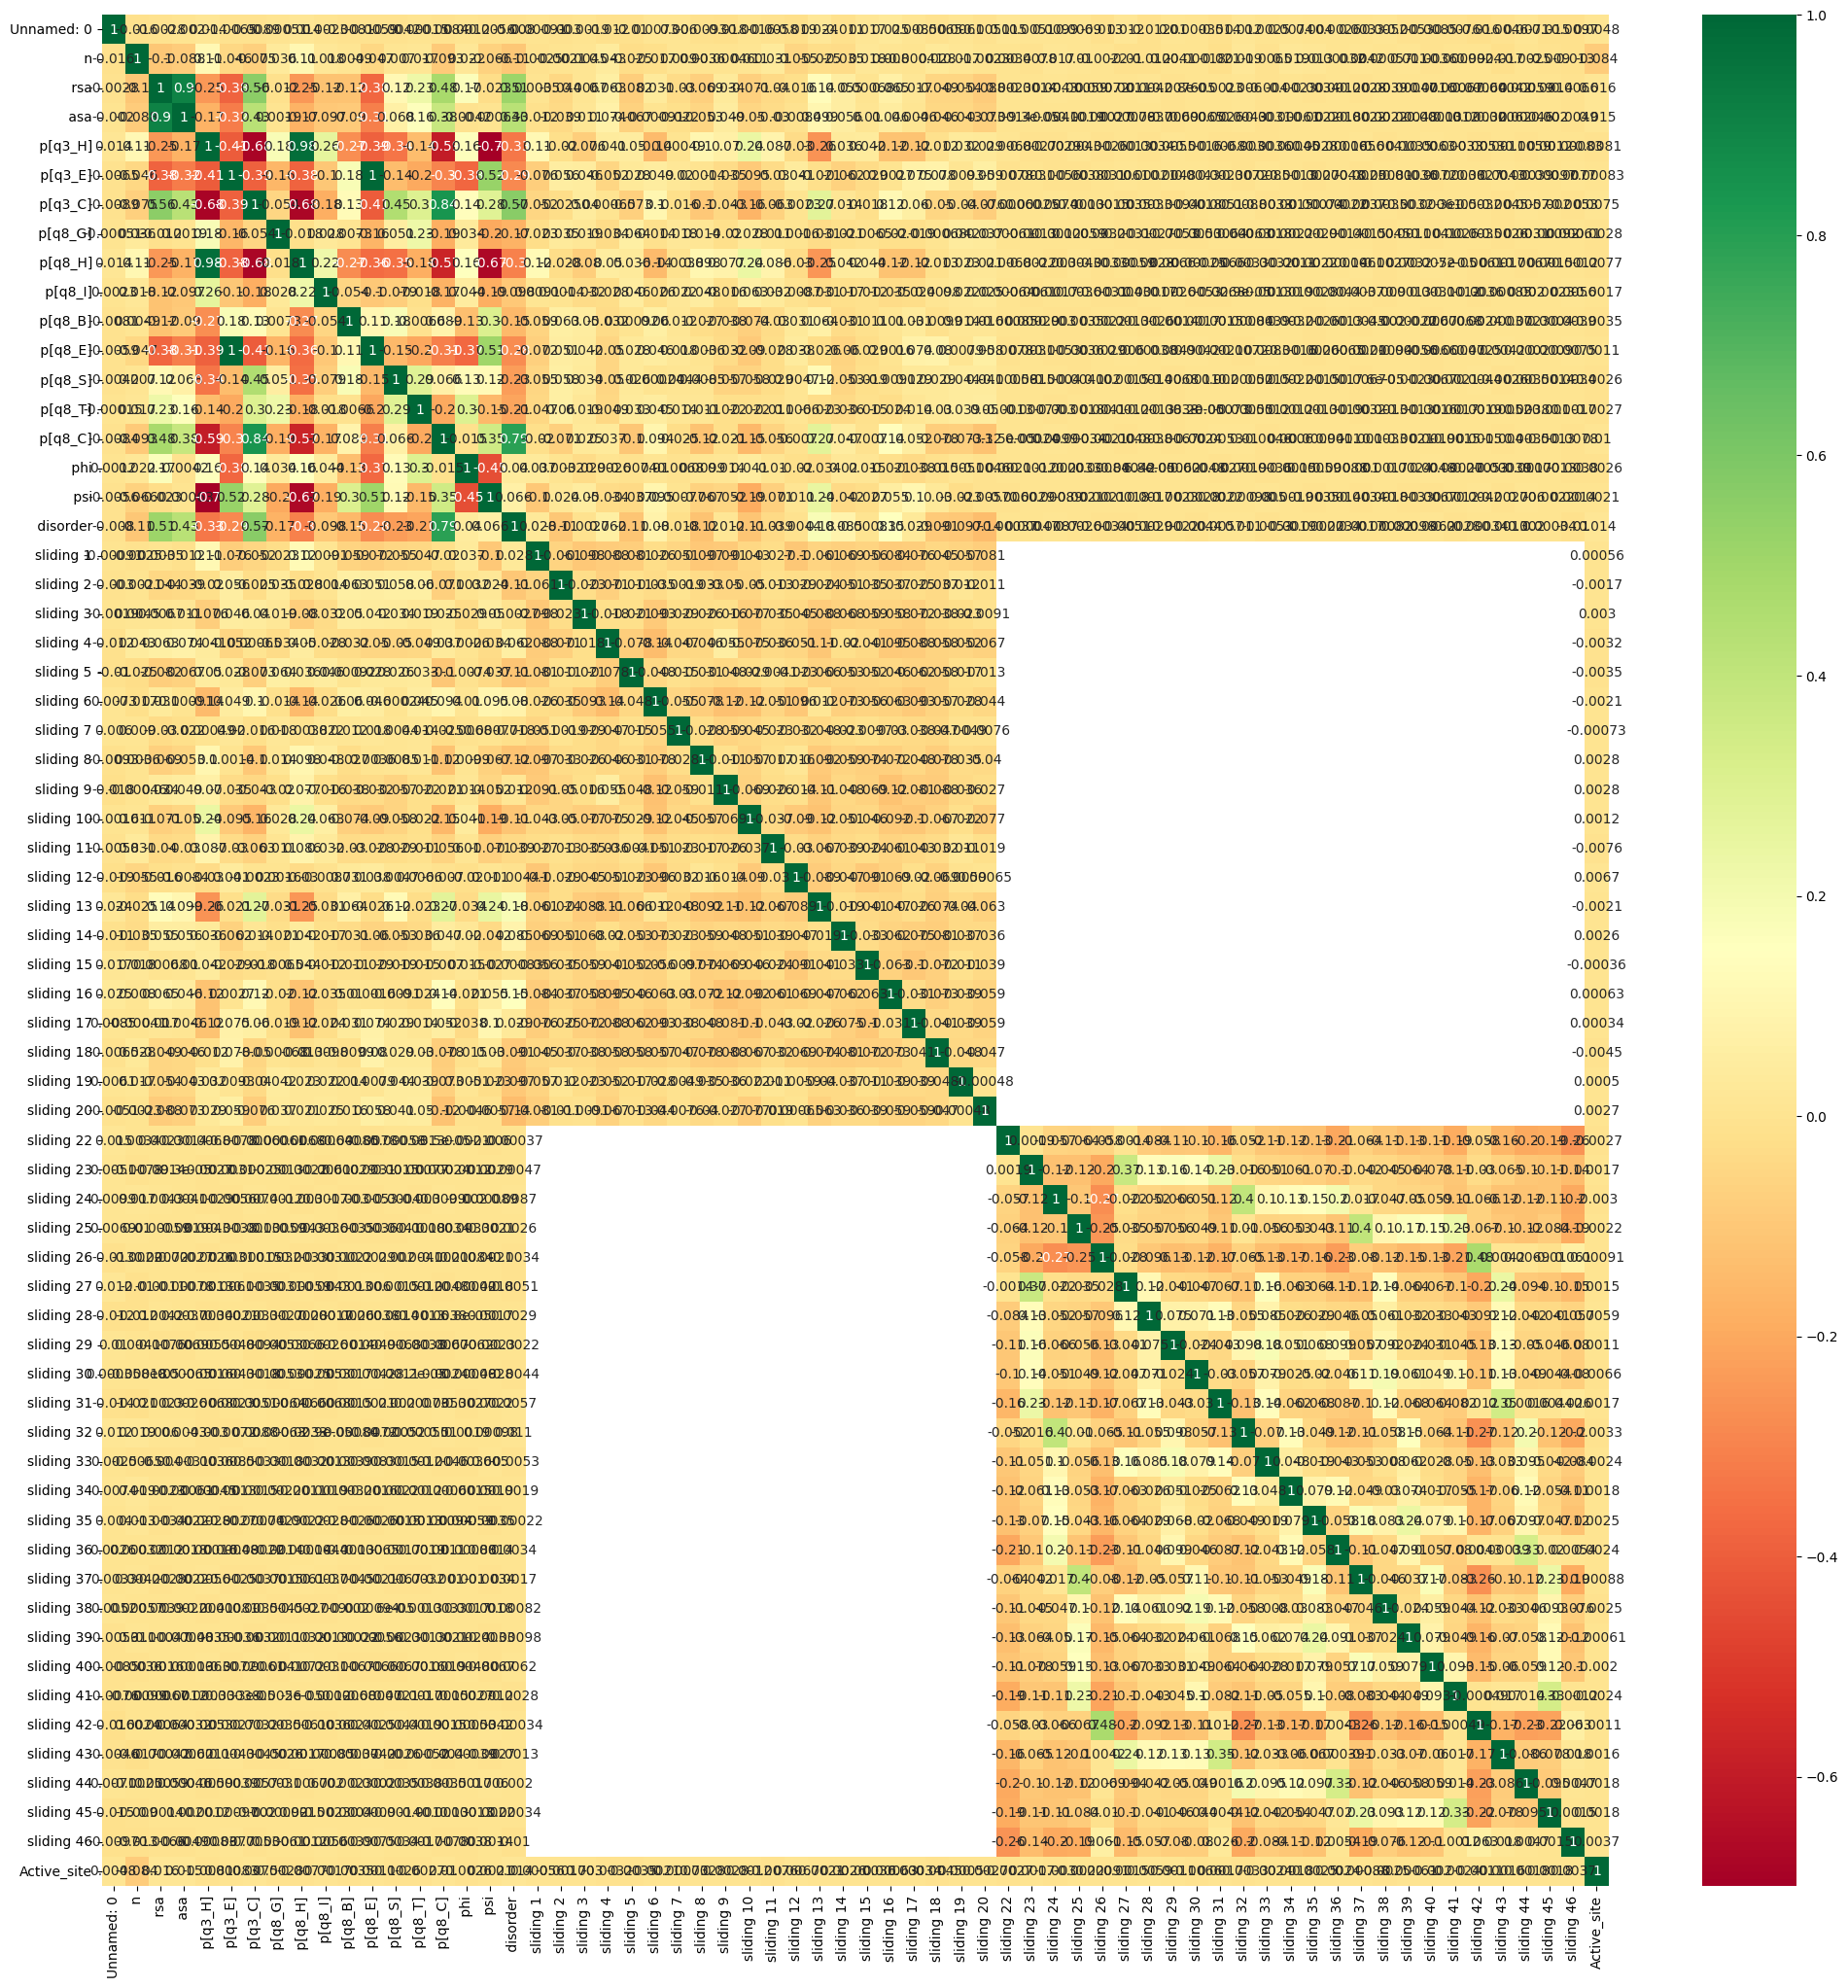

In [ ]:
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

2. Feature importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

[0.06113733 0.06920543 0.06734448 0.00067591 0.04568825 0.05160694
 0.04250483 0.00172526 0.06661902 0.05888198 0.0700975  0.07166048
 0.05570788 0.0671368  0.06062757 0.06339698 0.07398988 0.07199348]


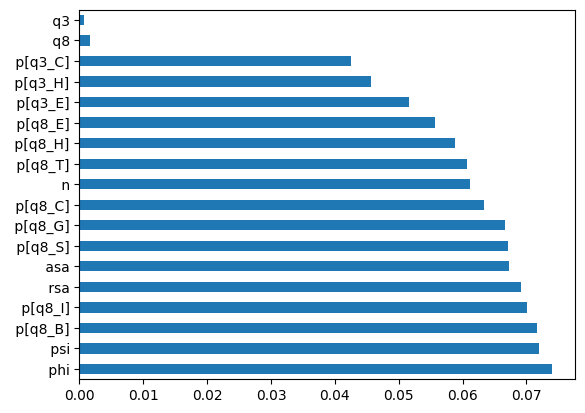

In [ ]:
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

In [ ]:
#Applying feature selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

clf_lr_dia = DecisionTreeClassifier()
clf_lr_dia.fit(X_train, y_train)

y_pred_lr = clf_lr_dia.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_lr))

3. RFE (Recursive Feature Elimination)

In [ ]:
#from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lr_model = DecisionTreeClassifier()
#lr_model = LinearRegression()
#Initializing RFE model
rfe = RFE(lr_model, n_features_to_select=5, step=1)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)
#Fitting the data to model
lr_model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
#no of features
nof_list=np.arange(1,8)
high_score=0
#Variable to store the optimum features
nof=0
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=nof_list[n], step=1)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
cols = list(X.columns)
model = DecisionTreeClassifier()
#Initializing RFE model
rfe = RFE(model, n_features_to_select=4)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)
#Fitting the data to model
model.fit(X_rfe,y)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

4. Embedded Method

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 10)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

##IMBALANCE TREATMENT

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Train data/data done.csv')
df.head()

,Unnamed: 0,id,seq,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],...,sliding 38,sliding 39,sliding 40,sliding 41,sliding 42,sliding 43,sliding 44,sliding 45,sliding 46,Active_site
0,0,>Protein 10,M,1,0.830846,186.109440,C,0.000042,0.000097,0.999861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,>Protein 10,G,2,0.764765,79.535569,C,0.000306,0.000595,0.999099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,>Protein 10,G,3,0.738790,76.834126,C,0.000478,0.000476,0.999047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3,>Protein 10,W,4,0.705228,200.990040,C,0.000705,0.000556,0.998740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,4,>Protein 10,S,5,0.682048,105.717370,C,0.000970,0.000649,0.998380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
X = df.iloc[:, 3:21]
y = df.iloc[:, -1]

In [ ]:
X.iloc[:,2] = encoder.fit_transform(X.iloc[:,2])
X

<ipython-input-9-31367375bdfa>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:,2] = encoder.fit_transform(X.iloc[:,2])


,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],q8,p[q8_G],p[q8_H],p[q8_I],p[q8_B],p[q8_E],p[q8_S],p[q8_T],p[q8_C],phi,psi
0,1,0.830846,1618808,C,0.000042,0.000097,0.999861,C,0.000004,0.000015,8.502303e-07,0.000014,0.000037,0.000077,0.000137,0.999716,-41.631153,-163.699753
1,2,0.764765,1005319,C,0.000306,0.000595,0.999099,C,0.000049,0.000114,1.909426e-05,0.000095,0.000271,0.000514,0.000850,0.998089,95.853409,-128.947647
2,3,0.738790,975834,C,0.000478,0.000476,0.999047,C,0.000072,0.000199,1.440329e-05,0.000100,0.000217,0.000581,0.000835,0.997980,-63.045628,-115.778839
3,4,0.705228,1624360,C,0.000705,0.000556,0.998740,C,0.000105,0.000325,7.368159e-06,0.000129,0.000254,0.000703,0.000808,0.997670,-84.183647,-34.732327
4,5,0.682048,1262162,C,0.000970,0.000649,0.998380,C,0.000151,0.000504,8.537430e-06,0.000133,0.000307,0.001136,0.001052,0.996709,-87.458794,-89.210396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639852,205,0.198989,616217,H,0.658743,0.013471,0.327786,H,0.083988,0.576942,6.691687e-03,0.003353,0.009944,0.031956,0.122930,0.164196,-74.392387,-29.941523
1639853,206,0.178917,658224,H,0.522071,0.024489,0.453439,H,0.065541,0.470921,3.979254e-03,0.007651,0.015770,0.050983,0.139906,0.245249,-77.288170,-20.245777
1639854,207,0.600014,1474030,C,0.293405,0.027763,0.678832,C,0.055156,0.233162,2.957026e-03,0.009490,0.020986,0.053849,0.170557,0.453843,-83.163902,1.176538
1639855,208,0.528135,1409865,C,0.112372,0.020683,0.866945,C,0.021100,0.081986,1.676329e-03,0.009044,0.013711,0.046837,0.104285,0.721361,-86.413116,30.787659


In [ ]:
X.iloc[:,6] = encoder.fit_transform(X.iloc[:,6])
X

<ipython-input-10-9bbab1cf4c1a>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:,6] = encoder.fit_transform(X.iloc[:,6])


,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],q8,p[q8_G],p[q8_H],p[q8_I],p[q8_B],p[q8_E],p[q8_S],p[q8_T],p[q8_C],phi,psi
0,1,0.830846,1618808,C,0.000042,0.000097,1495277,C,0.000004,0.000015,8.502303e-07,0.000014,0.000037,0.000077,0.000137,0.999716,-41.631153,-163.699753
1,2,0.764765,1005319,C,0.000306,0.000595,1489350,C,0.000049,0.000114,1.909426e-05,0.000095,0.000271,0.000514,0.000850,0.998089,95.853409,-128.947647
2,3,0.738790,975834,C,0.000478,0.000476,1488934,C,0.000072,0.000199,1.440329e-05,0.000100,0.000217,0.000581,0.000835,0.997980,-63.045628,-115.778839
3,4,0.705228,1624360,C,0.000705,0.000556,1486540,C,0.000105,0.000325,7.368159e-06,0.000129,0.000254,0.000703,0.000808,0.997670,-84.183647,-34.732327
4,5,0.682048,1262162,C,0.000970,0.000649,1483787,C,0.000151,0.000504,8.537430e-06,0.000133,0.000307,0.001136,0.001052,0.996709,-87.458794,-89.210396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639852,205,0.198989,616217,H,0.658743,0.013471,619555,H,0.083988,0.576942,6.691687e-03,0.003353,0.009944,0.031956,0.122930,0.164196,-74.392387,-29.941523
1639853,206,0.178917,658224,H,0.522071,0.024489,723112,H,0.065541,0.470921,3.979254e-03,0.007651,0.015770,0.050983,0.139906,0.245249,-77.288170,-20.245777
1639854,207,0.600014,1474030,C,0.293405,0.027763,925894,C,0.055156,0.233162,2.957026e-03,0.009490,0.020986,0.053849,0.170557,0.453843,-83.163902,1.176538
1639855,208,0.528135,1409865,C,0.112372,0.020683,1150410,C,0.021100,0.081986,1.676329e-03,0.009044,0.013711,0.046837,0.104285,0.721361,-86.413116,30.787659


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'id', ' seq', ' n', ' rsa', ' asa', ' q3', ' p[q3_H]',
       ' p[q3_E]', ' p[q3_C]', ' q8', ' p[q8_G]', ' p[q8_H]', ' p[q8_I]',
       ' p[q8_B]', ' p[q8_E]', ' p[q8_S]', ' p[q8_T]', ' p[q8_C]', ' phi',
       ' psi', ' disorder', 'sliding 1', 'sliding 2', 'sliding 3', 'sliding 4',
       'sliding 5', 'sliding 6', 'sliding 7', 'sliding 8', 'sliding 9',
       'sliding 10', 'sliding 11', 'sliding 12', 'sliding 13', 'sliding 14',
       'sliding 15', 'sliding 16', 'sliding 17', 'sliding 18', 'sliding 19',
       'sliding 20', 'sliding 21', 'sliding 22', 'sliding 23', 'sliding 24',
       'sliding 25', 'sliding 26', 'sliding 27', 'sliding 28', 'sliding 29',
       'sliding 30', 'sliding 31', 'sliding 32', 'sliding 33', 'sliding 34',
       'sliding 35', 'sliding 36', 'sliding 37', 'sliding 38', 'sliding 39',
       'sliding 40', 'sliding 41', 'sliding 42', 'sliding 43', 'sliding 44',
       'sliding 45', 'sliding 46', 'Active_site'],
      dtype='object')


In [ ]:
dt_importances = [' phi',' psi', ' asa', ' rsa', ' p[q8_G]', ' p[q8_H]', ' p[q8_I]',
' p[q8_B]', ' p[q8_E]', ' p[q8_S]', ' p[q8_T]', ' p[q8_C]', ' p[q3_H]',
       ' p[q3_E]', ' p[q3_C]',' n' ]
X= X[dt_importances]
X.head()

,phi,psi,asa,rsa,p[q8_G],p[q8_H],p[q8_I],p[q8_B],p[q8_E],p[q8_S],p[q8_T],p[q8_C],p[q3_H],p[q3_E],p[q3_C],n
0,-41.631153,-163.699753,1618808,0.830846,0.000004,0.000015,8.502303e-07,0.000014,0.000037,0.000077,0.000137,0.999716,0.000042,0.000097,1495277,1
1,95.853409,-128.947647,1005319,0.764765,0.000049,0.000114,1.909426e-05,0.000095,0.000271,0.000514,0.000850,0.998089,0.000306,0.000595,1489350,2
2,-63.045628,-115.778839,975834,0.738790,0.000072,0.000199,1.440329e-05,0.000100,0.000217,0.000581,0.000835,0.997980,0.000478,0.000476,1488934,3
3,-84.183647,-34.732327,1624360,0.705228,0.000105,0.000325,7.368159e-06,0.000129,0.000254,0.000703,0.000808,0.997670,0.000705,0.000556,1486540,4
4,-87.458794,-89.210396,1262162,0.682048,0.000151,0.000504,8.537430e-06,0.000133,0.000307,0.001136,0.001052,0.996709,0.000970,0.000649,1483787,5


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
df = df.iloc[:,1:].groupby('Active_site').count()

In [ ]:
# See group count
y_train.value_counts()

0.0    1197369
1.0      32523
Name: Active_site, dtype: int64

In [ ]:
# See the counter collection of our training data
from collections import Counter
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0.0: 1197369, 1.0: 32523})


In [ ]:
X_train

,phi,psi,asa,rsa,p[q8_G],p[q8_H],p[q8_I],p[q8_B],p[q8_E],p[q8_S],p[q8_T],p[q8_C],p[q3_H],p[q3_E],p[q3_C],n
1455142,-65.748505,-21.138378,1121527,0.569645,0.091022,0.010208,2.752438e-04,0.000440,0.002038,0.181663,0.671987,0.042365,0.106361,0.006191,1181916,39
1496411,-107.173096,133.315872,262352,0.089981,0.000660,0.000244,1.175163e-05,0.012331,0.404732,0.022887,0.005020,0.554115,0.001129,0.463438,792053,190
1464382,-116.540535,156.348495,656962,0.328356,0.001971,0.000462,2.752057e-05,0.007956,0.008458,0.794323,0.018105,0.168699,0.004169,0.027286,1352411,1225
1358485,-77.228142,21.140463,467588,0.281652,0.085765,0.120653,3.925861e-04,0.014864,0.019938,0.049673,0.060830,0.647885,0.240902,0.036535,971375,36
400124,81.865204,8.241909,653472,0.486826,0.028344,0.039993,4.052055e-03,0.007546,0.052447,0.193026,0.365763,0.308829,0.077577,0.062790,1139785,1107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349513,-104.006401,146.205658,1295766,0.630510,0.001328,0.004686,1.107713e-04,0.006094,0.008647,0.054507,0.006213,0.918414,0.005213,0.014032,1393510,22
971256,-71.793724,-31.295982,812683,0.267303,0.059332,0.688991,1.435991e-02,0.004008,0.039108,0.027937,0.075134,0.091130,0.748790,0.043562,510214,174
891043,-65.587517,-34.631351,53182,0.024993,0.145480,0.807140,1.147902e-02,0.000219,0.000278,0.002469,0.027775,0.005159,0.972928,0.000471,204957,324
600576,-88.208893,-11.859727,327655,0.196504,0.029064,0.119537,1.409702e-03,0.006355,0.116112,0.013897,0.023792,0.689832,0.147743,0.127381,973847,12


1. Under sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_rus))

Resampled dataset shape Counter({0.0: 32523, 1.0: 32523})


In [ ]:
# DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
clf_lr_rus = DecisionTreeClassifier()
clf_lr_rus.fit(X_rus, y_rus)

DecisionTreeClassifier()

In [ ]:
y_pred_lr_rus = clf_lr_rus.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('Accuracy = ', accuracy_score(y_test, y_pred_lr_rus))
print(classification_report(y_test, y_pred_lr_rus))

Accuracy =  0.5957289036869001
              precision    recall  f1-score   support

         0.0       0.98      0.60      0.74    399124
         1.0       0.04      0.59      0.07     10841

    accuracy                           0.60    409965
   macro avg       0.51      0.59      0.41    409965
weighted avg       0.96      0.60      0.72    409965



In [ ]:
# RandomForestClassifiermodel
from sklearn.ensemble import RandomForestClassifier
clf_rf_rus = RandomForestClassifier()
clf_rf_rus.fit(X_rus, y_rus)

RandomForestClassifier()

In [ ]:
y_pred_rf_rus = clf_rf_rus.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('Accuracy = ', accuracy_score(y_test, y_pred_rf_rus))
print(classification_report(y_test, y_pred_rf_rus))

Accuracy =  0.5957289036869001
              precision    recall  f1-score   support

         0.0       0.98      0.60      0.74    399124
         1.0       0.04      0.59      0.07     10841

    accuracy                           0.60    409965
   macro avg       0.51      0.59      0.41    409965
weighted avg       0.96      0.60      0.72    409965



2. Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=0.25)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_ros))

Resampled dataset shape Counter({0.0: 1197369, 1.0: 299342})


In [ ]:
# DecisionTreeClassifier model
clf_lr_ros = DecisionTreeClassifier()
clf_lr_ros.fit(X_ros, y_ros)

DecisionTreeClassifier()

In [ ]:
y_pred_lr_ros = clf_lr_ros.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('Accuracy = ', accuracy_score(y_test, y_pred_lr_ros))
print(classification_report(y_test, y_pred_lr_ros))

Accuracy =  0.9487200126840096
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97    399124
         1.0       0.07      0.07      0.07     10841

    accuracy                           0.95    409965
   macro avg       0.52      0.52      0.52    409965
weighted avg       0.95      0.95      0.95    409965



In [ ]:
# RandomForestClassifier model
clf_rf_ros_rfc= RandomForestClassifier()
clf_rf_ros_rfc.fit(X_ros, y_ros)

RandomForestClassifier()

In [ ]:
y_pred_rf_ros = clf_rf_ros_rfc.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('Accuracy = ', accuracy_score(y_test, y_pred_lr_ros))
print(classification_report(y_test, y_pred_rf_ros))

Accuracy =  0.9708560486870831
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    399124
         1.0       0.08      0.01      0.02     10841

    accuracy                           0.97    409965
   macro avg       0.53      0.50      0.50    409965
weighted avg       0.95      0.97      0.96    409965



3. ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_adasyn))

Resampled dataset shape Counter({1.0: 1199576, 0.0: 1197369})


In [ ]:
clf_lr_adasyn = DecisionTreeClassifier()
clf_lr_adasyn.fit(X_adasyn, y_adasyn)

y_pred_lr_adasyn = clf_lr_adasyn.predict(X_test)
print('Accuracy = ', accuracy_score(y_test, y_pred_lr_adasyn))
print(classification_report(y_test, y_pred_lr_adasyn))

Accuracy =  0.8370446257607357
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91    399124
         1.0       0.04      0.22      0.07     10841

    accuracy                           0.84    409965
   macro avg       0.51      0.54      0.49    409965
weighted avg       0.95      0.84      0.89    409965



4. Borderline **SMOTE*

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE()
X_bsmote, y_bsmote = bsmote.fit_resample(X_train, y_train)

In [ ]:
clf_lr_bsmote = DecisionTreeClassifier()
clf_lr_bsmote.fit(X_bsmote, y_bsmote)

y_pred_lr_bsmote = clf_lr_bsmote.predict(X_test)
print('Accuracy = ', accuracy_score(y_test, y_pred_lr_bsmote))
print(classification_report(y_test, y_pred_lr_bsmote))

5. SMOTE - Synthetic Minority Over-sampling Technique

In [ ]:
from imblearn.over_sampling import SMOTE

bsmote = SMOTE()
X_bsmote, y_bsmote = bsmote.fit_resample(X_train, y_train)

In [ ]:
clf_lr_bsmote = DecisionTreeClassifier()
clf_lr_bsmote.fit(X_bsmote, y_bsmote)

y_pred_lr_bsmote = clf_lr_bsmote.predict(X_test)
print('Accuracy = ', accuracy_score(y_test, y_pred_lr_bsmote))
print(classification_report(y_test, y_pred_lr_bsmote))

### Threshold optimization

In [ ]:
clf_lr_ori = DecisionTreeClassifier()
clf_lr_ori.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predict to return prediction results
y_pred_lr_ori = clf_lr_ori.predict(X_test)
y_pred_lr_ori

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
# Predict_proba to return probabilities
y_pred_lr_ori_prob = clf_lr_ori.predict_proba(X_test)
y_pred_lr_ori_prob

In [ ]:
# Keep probabilities for the positive data only
y_pred_lr_ori_prob = y_pred_lr_ori_prob[:, 1]
y_pred_lr_ori_prob

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
## Calculate accuracy
xx = [1 for x in y_pred_lr_ori_prob if x >= 0.5]
len(xx)

13180

In [ ]:
## Change threshold
xx = [1 for x in y_pred_lr_ori_prob if x >= 0.4]
yy = [1 for y in y_pred_lr_ori_prob if y < 0.4]
len(xx), len(yy)

(13180, 396785)

#### Using ROC curve

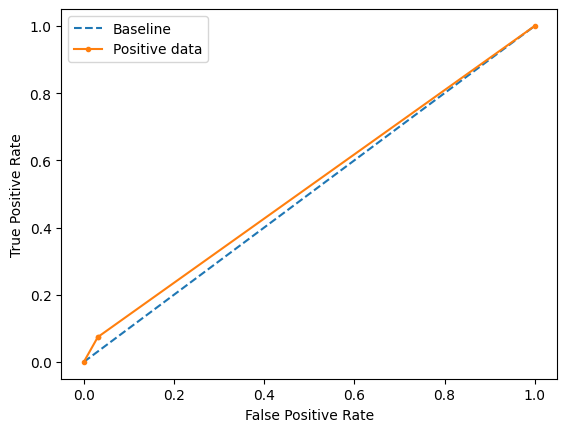

In [ ]:
# Calculate ROC curves
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_ori_prob)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='Baseline')
plt.plot(fpr, tpr, marker='.', label='Positive data')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.500000, G-Mean=0.268


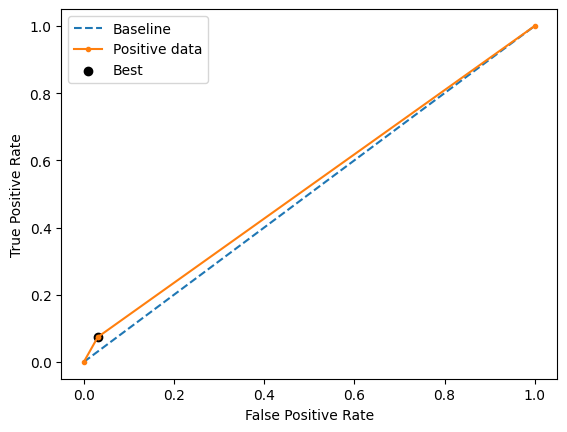

In [ ]:
import numpy as np
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_ori_prob)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='Baseline')
plt.plot(fpr, tpr, marker='.', label='Positive data')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

#### Using optimal threshold

In [ ]:
decisions = (y_pred_lr_ori_prob >= 0.357613).astype(int)
decisions

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test, decisions))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97    399124
         1.0       0.06      0.07      0.07     10841

    accuracy                           0.95    409965
   macro avg       0.52      0.52      0.52    409965
weighted avg       0.95      0.95      0.95    409965



##OPTIMIZE MODEL

###IMBALANCE TREATMENT

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TMU course/Final project 1/Test Data/Test_done.csv')
df.head()

,Unnamed: 0,id,seq,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],...,sliding 38,sliding 39,sliding 40,sliding 41,sliding 42,sliding 43,sliding 44,sliding 45,sliding 46,Active_site_1
0,0,>Protein 1,K,1.0,0.612282,144.498561,C,0.000808,0.011951,0.987241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,>Protein 1,V,2.0,0.446369,77.668262,C,0.001990,0.314979,0.683032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,>Protein 1,F,3.0,0.077968,18.712351,C,0.000781,0.381281,0.617938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3,>Protein 1,G,4.0,0.322097,33.498126,C,0.003078,0.032585,0.964336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,4,>Protein 1,R,5.0,0.236178,64.712799,H,0.985566,0.000384,0.014050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
X = df.iloc[:, 3:-1]
y = df.iloc[:, -1]

In [ ]:
X.iloc[:,3] = encoder.fit_transform(X.iloc[:,3])
X

<ipython-input-123-e81e4fce217e>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:,3] = encoder.fit_transform(X.iloc[:,3])


,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],q8,p[q8_G],p[q8_H],...,sliding 37,sliding 38,sliding 39,sliding 40,sliding 41,sliding 42,sliding 43,sliding 44,sliding 45,sliding 46
0,1.0,0.612282,144.498561,0,0.000808,0.011951,0.987241,C,0.000488,0.000251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,0.446369,77.668262,0,0.001990,0.314979,0.683032,C,0.001290,0.000607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,0.077968,18.712351,0,0.000781,0.381281,0.617938,C,0.000303,0.000375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,0.322097,33.498126,0,0.003078,0.032585,0.964336,C,0.000136,0.001605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,0.236178,64.712799,2,0.985566,0.000384,0.014050,H,0.008363,0.977577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,219.0,0.323290,50.109962,0,0.056830,0.274536,0.668634,C,0.029784,0.022066,...,0.007905,0.007905,0.039526,0.031621,0.047431,0.055336,0.055336,0.079051,0.023715,0.031621
348,220.0,0.204818,31.746796,0,0.045203,0.349968,0.604829,E,0.025096,0.016454,...,0.050505,0.030303,0.070707,0.060606,0.040404,0.040404,0.030303,0.060606,0.000000,0.040404
349,221.0,0.302409,82.860064,1,0.038939,0.543399,0.417662,E,0.017615,0.016540,...,0.010363,0.077720,0.054404,0.018135,0.044041,0.121762,0.051813,0.059585,0.036269,0.031088
350,222.0,0.051508,10.147027,1,0.022476,0.810678,0.166847,E,0.006079,0.012559,...,0.000000,0.052632,0.000000,0.021053,0.010526,0.094737,0.147368,0.063158,0.010526,0.010526


In [ ]:
X.iloc[:,7] = encoder.fit_transform(X.iloc[:,7])
X

<ipython-input-124-4af5898cc156>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:,7] = encoder.fit_transform(X.iloc[:,7])


,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],q8,p[q8_G],p[q8_H],...,sliding 37,sliding 38,sliding 39,sliding 40,sliding 41,sliding 42,sliding 43,sliding 44,sliding 45,sliding 46
0,1.0,0.612282,144.498561,0,0.000808,0.011951,0.987241,0,0.000488,0.000251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,0.446369,77.668262,0,0.001990,0.314979,0.683032,0,0.001290,0.000607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,0.077968,18.712351,0,0.000781,0.381281,0.617938,0,0.000303,0.000375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,0.322097,33.498126,0,0.003078,0.032585,0.964336,0,0.000136,0.001605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,0.236178,64.712799,2,0.985566,0.000384,0.014050,3,0.008363,0.977577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,219.0,0.323290,50.109962,0,0.056830,0.274536,0.668634,0,0.029784,0.022066,...,0.007905,0.007905,0.039526,0.031621,0.047431,0.055336,0.055336,0.079051,0.023715,0.031621
348,220.0,0.204818,31.746796,0,0.045203,0.349968,0.604829,1,0.025096,0.016454,...,0.050505,0.030303,0.070707,0.060606,0.040404,0.040404,0.030303,0.060606,0.000000,0.040404
349,221.0,0.302409,82.860064,1,0.038939,0.543399,0.417662,1,0.017615,0.016540,...,0.010363,0.077720,0.054404,0.018135,0.044041,0.121762,0.051813,0.059585,0.036269,0.031088
350,222.0,0.051508,10.147027,1,0.022476,0.810678,0.166847,1,0.006079,0.012559,...,0.000000,0.052632,0.000000,0.021053,0.010526,0.094737,0.147368,0.063158,0.010526,0.010526


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'id', ' seq', ' n', ' rsa', ' asa', ' q3', ' p[q3_H]',
       ' p[q3_E]', ' p[q3_C]', ' q8', ' p[q8_G]', ' p[q8_H]', ' p[q8_I]',
       ' p[q8_B]', ' p[q8_E]', ' p[q8_S]', ' p[q8_T]', ' p[q8_C]', ' phi',
       ' psi', ' disorder', 'sliding 1', 'sliding 2', 'sliding 3', 'sliding 4',
       'sliding 5', 'sliding 6', 'sliding 7', 'sliding 8', 'sliding 9',
       'sliding 10', 'sliding 11', 'sliding 12', 'sliding 13', 'sliding 14',
       'sliding 15', 'sliding 16', 'sliding 17', 'sliding 18', 'sliding 19',
       'sliding 20', 'sliding 21', 'sliding 22', 'sliding 23', 'sliding 24',
       'sliding 25', 'sliding 26', 'sliding 27', 'sliding 28', 'sliding 29',
       'sliding 30', 'sliding 31', 'sliding 32', 'sliding 33', 'sliding 34',
       'sliding 35', 'sliding 36', 'sliding 37', 'sliding 38', 'sliding 39',
       'sliding 40', 'sliding 41', 'sliding 42', 'sliding 43', 'sliding 44',
       'sliding 45', 'sliding 46', 'Active_site_1'],
      dtype='object')


In [ ]:
dt_importances = [' phi',' psi', ' asa', ' rsa', ' p[q8_G]', ' p[q8_H]', ' p[q8_I]',
' p[q8_B]', ' p[q8_E]', ' p[q8_S]', ' p[q8_T]', ' p[q8_C]', ' p[q3_H]',
       ' p[q3_E]', ' p[q3_C]',' n' ]
X= X[dt_importances]
X.head()

,phi,psi,asa,rsa,p[q8_G],p[q8_H],p[q8_I],p[q8_B],p[q8_E],p[q8_S],p[q8_T],p[q8_C],p[q3_H],p[q3_E],p[q3_C],n
0,-109.682068,139.167679,144.498561,0.612282,0.000488,0.000251,0.000016,0.001590,0.011732,0.043060,0.010020,0.932843,0.000808,0.011951,0.987241,1.0
1,-98.697678,132.387070,77.668262,0.446369,0.001290,0.000607,0.000068,0.079169,0.210377,0.038349,0.009040,0.661099,0.001990,0.314979,0.683032,2.0
2,-112.791687,141.483154,18.712351,0.077968,0.000303,0.000375,0.000039,0.136875,0.237513,0.042828,0.001397,0.580670,0.000781,0.381281,0.617938,3.0
3,-77.287743,162.942291,33.498126,0.322097,0.000136,0.001605,0.000003,0.005408,0.014057,0.012382,0.001253,0.965156,0.003078,0.032585,0.964336,4.0
4,-54.326691,-40.833698,64.712799,0.236178,0.008363,0.977577,0.000495,0.000138,0.000123,0.001451,0.007761,0.004092,0.985566,0.000384,0.014050,5.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
df = df.iloc[:,1:].groupby('Active_site_1').count()

In [ ]:
# See group count
y_train.value_counts()

0.0    264
Name: Active_site_1, dtype: int64

In [ ]:
# See the counter collection of our training data
from collections import Counter
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0.0: 264})


In [ ]:
X_train

,phi,psi,asa,rsa,p[q8_G],p[q8_H],p[q8_I],p[q8_B],p[q8_E],p[q8_S],p[q8_T],p[q8_C],p[q3_H],p[q3_E],p[q3_C],n
149,-102.484474,100.340096,66.749491,0.338830,0.017766,0.026329,0.000772,0.024125,0.437925,0.084433,0.058562,0.350087,0.042706,0.464054,0.493240,21.0
44,-118.245918,126.516220,153.488228,0.560176,0.000955,0.000292,0.000077,0.086773,0.628253,0.027469,0.008140,0.248041,0.000938,0.729928,0.269134,45.0
37,-56.290310,68.794701,27.849312,0.116039,0.001722,0.001405,0.000076,0.004734,0.001986,0.225358,0.077868,0.686851,0.003316,0.003509,0.993174,38.0
176,-88.894608,52.263191,84.012096,0.375054,0.110843,0.106110,0.002327,0.025316,0.153336,0.134215,0.168220,0.299632,0.233667,0.187050,0.579283,48.0
184,-76.317581,-26.075012,23.402133,0.140133,0.076079,0.453647,0.003962,0.013486,0.098213,0.056640,0.062461,0.235510,0.551779,0.111950,0.336271,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,-98.697678,132.387070,77.668262,0.446369,0.001290,0.000607,0.000068,0.079169,0.210377,0.038349,0.009040,0.661099,0.001990,0.314979,0.683032,2.0
22,-96.771484,138.361664,29.628710,0.112657,0.012325,0.014807,0.000500,0.083222,0.060748,0.158859,0.046030,0.623508,0.032645,0.122771,0.844584,23.0
25,-62.899185,-42.426964,7.982682,0.076757,0.022014,0.909101,0.002859,0.000395,0.000725,0.012902,0.034407,0.017598,0.902147,0.002076,0.095777,26.0
245,-113.483665,141.996140,28.527596,0.118865,0.012574,0.016512,0.000501,0.020372,0.554936,0.074426,0.044710,0.275970,0.030824,0.571828,0.397348,117.0


1. Under sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_rus))

In [ ]:
# DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
clf_lr_rus = DecisionTreeClassifier()
clf_lr_rus.fit(X_rus, y_rus)

DecisionTreeClassifier()

In [ ]:
y_pred_lr_rus = clf_lr_rus.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('Accuracy = ', accuracy_score(y_test, y_pred_lr_rus))
print(classification_report(y_test, y_pred_lr_rus))

Accuracy =  0.5957289036869001
              precision    recall  f1-score   support

         0.0       0.98      0.60      0.74    399124
         1.0       0.04      0.59      0.07     10841

    accuracy                           0.60    409965
   macro avg       0.51      0.59      0.41    409965
weighted avg       0.96      0.60      0.72    409965



In [ ]:
# RandomForestClassifiermodel
from sklearn.ensemble import RandomForestClassifier
clf_rf_rus = RandomForestClassifier()
clf_rf_rus.fit(X_rus, y_rus)

RandomForestClassifier()

In [ ]:
y_pred_rf_rus = clf_rf_rus.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('Accuracy = ', accuracy_score(y_test, y_pred_rf_rus))
print(classification_report(y_test, y_pred_rf_rus))

Accuracy =  0.5957289036869001
              precision    recall  f1-score   support

         0.0       0.98      0.60      0.74    399124
         1.0       0.04      0.59      0.07     10841

    accuracy                           0.60    409965
   macro avg       0.51      0.59      0.41    409965
weighted avg       0.96      0.60      0.72    409965



2. Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=0.25)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_ros))

Resampled dataset shape Counter({0.0: 1197369, 1.0: 299342})


In [ ]:
# DecisionTreeClassifier model
clf_lr_ros = DecisionTreeClassifier()
clf_lr_ros.fit(X_ros, y_ros)

DecisionTreeClassifier()

In [ ]:
y_pred_lr_ros = clf_lr_ros.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('Accuracy = ', accuracy_score(y_test, y_pred_lr_ros))
print(classification_report(y_test, y_pred_lr_ros))

Accuracy =  0.9487200126840096
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97    399124
         1.0       0.07      0.07      0.07     10841

    accuracy                           0.95    409965
   macro avg       0.52      0.52      0.52    409965
weighted avg       0.95      0.95      0.95    409965



In [ ]:
# RandomForestClassifier model
clf_rf_ros_rfc= RandomForestClassifier()
clf_rf_ros_rfc.fit(X_ros, y_ros)

RandomForestClassifier()

In [ ]:
y_pred_rf_ros = clf_rf_ros_rfc.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('Accuracy = ', accuracy_score(y_test, y_pred_lr_ros))
print(classification_report(y_test, y_pred_rf_ros))

Accuracy =  0.9708560486870831
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    399124
         1.0       0.08      0.01      0.02     10841

    accuracy                           0.97    409965
   macro avg       0.53      0.50      0.50    409965
weighted avg       0.95      0.97      0.96    409965



3. ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_adasyn))

Resampled dataset shape Counter({1.0: 1199576, 0.0: 1197369})


In [ ]:
clf_lr_adasyn = DecisionTreeClassifier()
clf_lr_adasyn.fit(X_adasyn, y_adasyn)

y_pred_lr_adasyn = clf_lr_adasyn.predict(X_test)
print('Accuracy = ', accuracy_score(y_test, y_pred_lr_adasyn))
print(classification_report(y_test, y_pred_lr_adasyn))

Accuracy =  0.8370446257607357
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91    399124
         1.0       0.04      0.22      0.07     10841

    accuracy                           0.84    409965
   macro avg       0.51      0.54      0.49    409965
weighted avg       0.95      0.84      0.89    409965



4. Borderline **SMOTE*

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE()
X_bsmote, y_bsmote = bsmote.fit_resample(X_train, y_train)

In [ ]:
clf_lr_bsmote = DecisionTreeClassifier()
clf_lr_bsmote.fit(X_bsmote, y_bsmote)

y_pred_lr_bsmote = clf_lr_bsmote.predict(X_test)
print('Accuracy = ', accuracy_score(y_test, y_pred_lr_bsmote))
print(classification_report(y_test, y_pred_lr_bsmote))

5. SMOTE - Synthetic Minority Over-sampling Technique

In [ ]:
from imblearn.over_sampling import SMOTE

bsmote = SMOTE()
X_bsmote, y_bsmote = bsmote.fit_resample(X_train, y_train)

In [ ]:
clf_lr_bsmote = DecisionTreeClassifier()
clf_lr_bsmote.fit(X_bsmote, y_bsmote)

y_pred_lr_bsmote = clf_lr_bsmote.predict(X_test)
print('Accuracy = ', accuracy_score(y_test, y_pred_lr_bsmote))
print(classification_report(y_test, y_pred_lr_bsmote))